In [1]:
import numpy as np

#### Import the data

In [2]:
dataset = np.loadtxt(r'../data/A_Z Handwritten Data.csv', delimiter=',')

In [3]:
dataset.shape

(372451, 785)

We have 372451 rows

In [4]:
X = dataset[:,0:784]
Y = dataset[:,0] # our target variable

#### Let's validate the Y values range between 0 and 25 for all the upper case letters

In [5]:
print("The min is " + str(Y.min()) + " and the max is " + str(Y.max()))

The min is 0.0 and the max is 25.0


#### Let's look at what these images look like

In [6]:
from keras.preprocessing.image import array_to_img # We are going to need these functions for preprocessing
tmpImg = X[30].reshape(28, 28, 1).astype('float32')
array_to_img(tmpImg)

Using TensorFlow backend.


#### Let's validate that all the images are in order

In [7]:
numSwitch = 0
priorLetter = 0.0
for i in range(len(Y)):
    if Y[i] != priorLetter:
        numSwitch = numSwitch + 1
        priorLetter = priorLetter + 1
print(numSwitch)

25


We see that the letters are allready all in order since we only switched letters 25 times

#### Let's explore the data

In [8]:
#This prints the count of each alphabet char. 0 is A and 25 is Z
unique, counts = np.unique(Y, return_counts=True)
frequencyCount = (np.asarray((unique, counts)).T)
frequencyCount

array([[0.0000e+00, 1.3870e+04],
       [1.0000e+00, 8.6680e+03],
       [2.0000e+00, 2.3409e+04],
       [3.0000e+00, 1.0134e+04],
       [4.0000e+00, 1.1440e+04],
       [5.0000e+00, 1.1630e+03],
       [6.0000e+00, 5.7620e+03],
       [7.0000e+00, 7.2180e+03],
       [8.0000e+00, 1.1200e+03],
       [9.0000e+00, 8.4930e+03],
       [1.0000e+01, 5.6030e+03],
       [1.1000e+01, 1.1586e+04],
       [1.2000e+01, 1.2336e+04],
       [1.3000e+01, 1.9010e+04],
       [1.4000e+01, 5.7825e+04],
       [1.5000e+01, 1.9341e+04],
       [1.6000e+01, 5.8120e+03],
       [1.7000e+01, 1.1566e+04],
       [1.8000e+01, 4.8419e+04],
       [1.9000e+01, 2.2495e+04],
       [2.0000e+01, 2.9008e+04],
       [2.1000e+01, 4.1820e+03],
       [2.2000e+01, 1.0784e+04],
       [2.3000e+01, 6.2720e+03],
       [2.4000e+01, 1.0859e+04],
       [2.5000e+01, 6.0760e+03]])

In [18]:
print("The deviation is ")
np.std(frequencyCount.T[1])

The deviation is 


13094.50255312913

In [19]:
print("The avg is ")
np.mean(frequencyCount.T[1])

The avg is 


14325.038461538461

In [9]:
#The max of any letter is
most = frequencyCount.T[1].max()
for i in range(25):
  if(frequencyCount.T[1][i] == most):
    print("The most pictures of any letter is ")
    print("Letter " + str(int(frequencyCount.T[0][i])) + " with " + str(int(most)) + " pictures")

The most pictures of any letter is 
Letter 14 with 57825 pictures


In [10]:
#The min of any letter is
minimum = frequencyCount.T[1].min()
print(minimum)
for i in range(25):
  if(frequencyCount.T[1][i] == minimum):
    print("The minimum pictures of any letter is ")
    print("Letter " + str(int(frequencyCount.T[0][i])) + " with " + str(int(minimum)) + " pictures")

1120.0
The minimum pictures of any letter is 
Letter 8 with 1120 pictures


Text(0.5, 1.0, 'Frequency Counts')

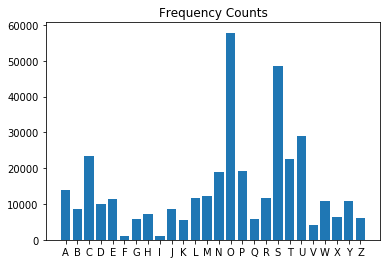

In [11]:
#Let's graph the distribution
%matplotlib inline
import matplotlib.pyplot as plt
import string
plt.bar(frequencyCount.T[0], frequencyCount.T[1], tick_label = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
plt.title("Frequency Counts")

We can create a hypothesis that this distribution is not representative of the true proportion of letters. 
Let's create a hypothesis test for a couple of the letters. 

The null hypothesis is that the true proportion of the letter 'I' is the same in a regular text as it is here. The alternate is that there is a significant difference.

Recall, the letter I has 1120 pictures. 

In [12]:
print("The percentage of the letter I is " + str(1120/len(X) * 100))

The percentage of the letter I is 0.3007106975145724


We find here http://practicalcryptography.com/cryptanalysis/letter-frequencies-various-languages/english-letter-frequencies/ that the true proportion of I is 7.33 percent with 4.5 billion samples

We can say this is a bernouli distribution. A 'success' is where the letter is a 'F'. A 'failure' is where it isn't an F. 
Recall that the sum of a bernouli distribution is binomial. 

We therefore can estimate sigma as sqrt(pq/n) and p = 7.33/100 and q = 1 -p and n = 4.5 billion
Note this is a consistant estimator so with so many samples we probably don't even really need to do this test https://en.wikipedia.org/wiki/Consistent_estimator


In [13]:
p = 7.33/100
q = 1- p

sigma = np.sqrt(p*q/4500000000)
sigma

3.8852172826411306e-06

Sigma is really really small due to the large number of samples We can make a really small 95 percent window

In [14]:
print("Upper 95 percent window " + str(7.33/100 + sigma * 1.96))
print("Lower 95 percent window " + str(7.33/100 - sigma * 1.96))

Upper 95 percent window 0.07330761502587398
Lower 95 percent window 0.07329238497412603


Our actual value percentage of 'I', .03 is very far away from it. We can conclude therefore that there is a significant difference between our distribution and the actual

Because the sample size is so large and we are dealing with a consistant estimator, we don't need to test all of the other letters. 
It is clear that our distribution is not the same as the regular frequencies. 
